# Từ get User playlist: 
- https://rapidapi.com/Lundehund/api/tiktok-api23/playground/apiendpoint_eae55501-258c-4168-a465-105799053094

```python
import http.client

conn = http.client.HTTPSConnection("tiktok-api23.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "634ee30be2mshf179e8ef90e0c34p17c30ejsn3886f01275d3",
    'x-rapidapi-host': "tiktok-api23.p.rapidapi.com"
}

conn.request("GET", "/api/user/playlist?secUid=MS4wLjABAAAAWFGzG2-_92Qv9a1I2XZIto24-CxXu2BRC3-HbwH13Y2SIsqt_j1XrNrvYOSHN6q4&count=20&cursor=0", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))
```


Sử dụng secUid để lấy danh sách video của user: 




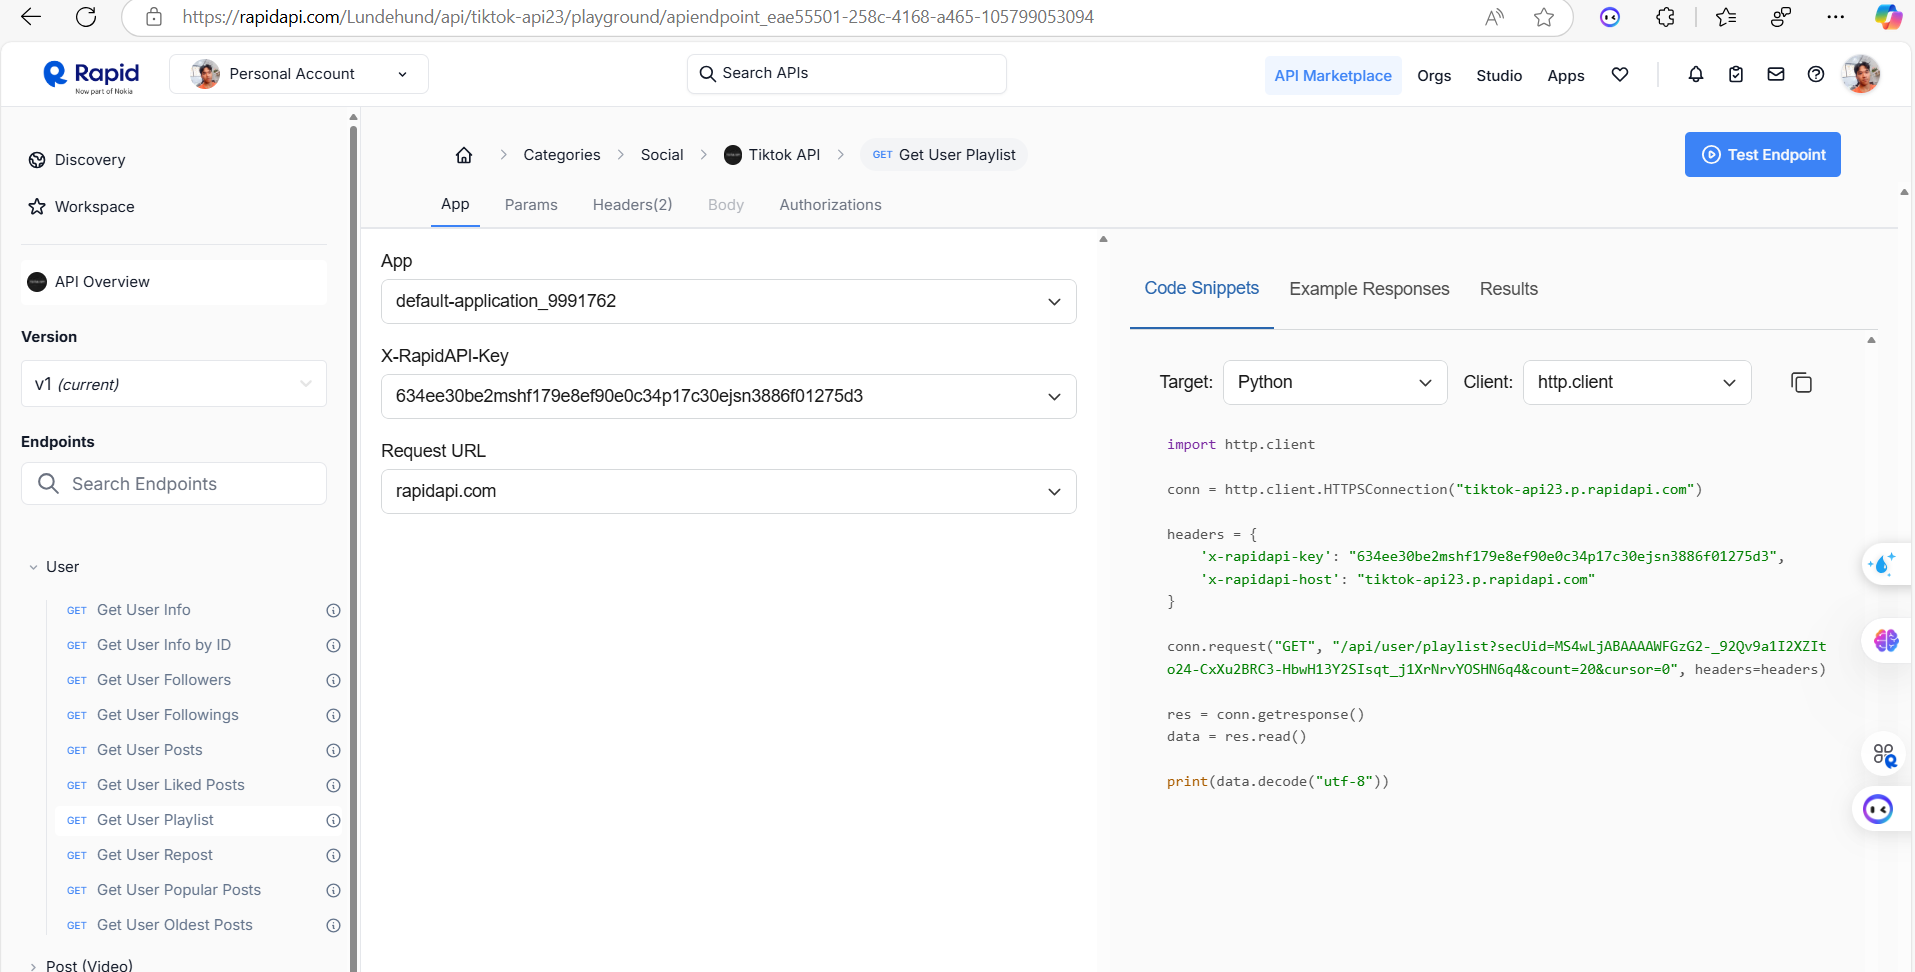

Nhờ GPT code và Cursor nó code. 


```python
import http.client
import json

def fetch_tiktok_videos(username, api_key, max_videos=5):
    """
    Fetch a list of TikTok videos for a given username.

    Args:
        username (str): TikTok username to fetch videos for.
        api_key (str): Your RapidAPI key.
        max_videos (int): Maximum number of videos to fetch.

    Returns:
        list: A list of dictionaries containing video details (id, description, URL).
    """
    try:
        # Kết nối tới TikTok API thông qua RapidAPI
        conn = http.client.HTTPSConnection("tiktok-api23.p.rapidapi.com")
        headers = {
            'x-rapidapi-key': api_key,
            'x-rapidapi-host': "tiktok-api23.p.rapidapi.com"
        }

        # Gửi yêu cầu API để lấy thông tin chi tiết về user, bao gồm secUid
        conn.request("GET", f"/api/user/detail?uniqueId={username}", headers=headers)
        res = conn.getresponse()
        user_data = json.loads(res.read().decode("utf-8"))

        # Lấy secUid từ kết quả
        sec_uid = user_data["userInfo"]["user"]["secUid"]

        # Gửi yêu cầu để lấy danh sách video
        conn.request("GET", f"/api/post/list?secUid={sec_uid}&count={max_videos}&cursor=0", headers=headers)
        res = conn.getresponse()
        video_data = json.loads(res.read().decode("utf-8"))

        # Chuẩn bị danh sách video
        videos = []
        for video in video_data["itemList"][:max_videos]:
            video_info = {
                "id": video["id"],
                "description": video["desc"],
                "url": f"https://www.tiktok.com/@{username}/video/{video['id']}"
            }
            videos.append(video_info)

        return videos

    except Exception as e:
        print(f"Error: {e}")
        return []

# Sử dụng hàm
if __name__ == "__main__":
    username = "moxierobot"
    api_key = "YOUR_RAPIDAPI_KEY"  # Thay bằng API key của bạn
    max_videos = 5  # Số lượng video tối đa

    video_list = fetch_tiktok_videos(username, api_key, max_videos)

    for video in video_list:
        print(f"Video ID: {video['id']}")
        print(f"Description: {video['description']}")
        print(f"Video URL: {video['url']}\n")

```

Tôi thấy vấn đề rồi. API trả về dữ liệu đúng nhưng code đang không xử lý đúng cấu trúc JSON. Hãy sửa lại đoạn xử lý response:

```python:tiktok2download/get_list_videos.py
def fetch_tiktok_videos(username, api_key, max_videos=5):
    """
    Fetch a list of TikTok videos for a given username.
    """
    try:
        # Kiểm tra API key
        if not api_key:
            print("API key is missing")
            return []

        conn = http.client.HTTPSConnection("tiktok-api23.p.rapidapi.com")
        headers = {
            'x-rapidapi-key': api_key,
            'x-rapidapi-host': "tiktok-api23.p.rapidapi.com"
        }

        # Step 1: Lấy thông tin user
        print(f"\nGetting videos for user: {username}")
        conn.request("GET", f"/api/user/info?uniqueId={username}", headers=headers)
        res = conn.getresponse()
        user_data = json.loads(res.read().decode("utf-8"))
        
        # Lấy secUid từ response
        sec_uid = user_data.get("userInfo", {}).get("user", {}).get("secUid")
        if not sec_uid:
            print("Could not find secUid")
            return []

        # Step 2: Lấy danh sách video
        conn.request("GET", f"/api/user/posts?secUid={sec_uid}&count={max_videos}&cursor=0", headers=headers)
        res = conn.getresponse()
        data = json.loads(res.read().decode("utf-8"))

        # Xử lý danh sách video từ itemList
        videos = []
        for item in data.get("data", {}).get("itemList", []):
            video_info = {
                "id": item.get("id"),
                "description": item.get("desc"),
                "create_time": item.get("createTime"),
                "duration": item.get("video", {}).get("duration"),
                "play_count": item.get("stats", {}).get("playCount"),
                "like_count": item.get("stats", {}).get("diggCount"),
                "comment_count": item.get("stats", {}).get("commentCount"),
                "share_count": item.get("stats", {}).get("shareCount"),
                "download_url": item.get("video", {}).get("downloadAddr"),
                "play_url": item.get("video", {}).get("playAddr"),
                "cover_url": item.get("video", {}).get("cover"),
                "url": f"https://www.tiktok.com/@{username}/video/{item.get('id')}"
            }
            videos.append(video_info)

        return videos

    except Exception as e:
        print(f"Error: {str(e)}")
        return []

if __name__ == "__main__":
    username = "moxierobot"
    api_key = os.getenv("TIKTOK_API_KEY")

    if not api_key:
        print("Error: TIKTOK_API_KEY environment variable not set")
        exit(1)

    videos = fetch_tiktok_videos(username, api_key)
    
    if not videos:
        print("\nNo videos found")
    else:
        print(f"\nFound {len(videos)} videos:")
        for video in videos:
            print("\n" + "="*50)
            print(f"Video ID: {video['id']}")
            print(f"Description: {video['description']}")
            print(f"Created: {video['create_time']}")
            print(f"Duration: {video['duration']}s")
            print(f"Stats:")
            print(f"- Views: {video['play_count']}")
            print(f"- Likes: {video['like_count']}")
            print(f"- Comments: {video['comment_count']}")
            print(f"- Shares: {video['share_count']}")
            print(f"URL: {video['url']}")
```

Những thay đổi chính:
1. Sửa lại cấu trúc xử lý JSON response - video list nằm trong `data.itemList`
2. Lấy thêm nhiều thông tin hơn cho mỗi video:
   - Thời gian tạo
   - Thời lượng
   - Số liệu thống kê (views, likes, comments, shares)
   - URL download và play
   - URL thumbnail

3. Format output đẹp hơn với các thông tin chi tiết

Để sử dụng:
1. Đảm bảo có API key trong biến môi trường:
```bash
export TIKTOK_API_KEY=your_api_key_here
```

2. Chạy script và bạn sẽ thấy thông tin chi tiết của mỗi video



```
PS D:\OneDrive - Hanoi University of Science and Technology\GIT\BasicTasks_PreProcessingTools\Crawl_Tiktok> & C:/Users/User/AppData/Local/Microsoft/WindowsApps/python3.12.exe "d:/OneDrive - Hanoi University of Science and Technology/GIT/BasicTasks_PreProcessingTools/Crawl_Tiktok/tiktok2download/get_list_videos.py"

Getting videos for user: moxierobot

Found 7 videos:

==================================================
Video ID: 7255473484782996778
Description: What’s your favorite color? Let us know in the comments! #moxierobot #robotsontiktok #socialemotionaldevelopment #robotconversations
Created: 1689296569
Duration: 51s
Stats:
- Views: 105700
- Likes: 5252
- Comments: 164
- Shares: 710
URL: https://www.tiktok.com/@moxierobot/video/7255473484782996778

==================================================
Video ID: 7120391571987533098
Description: Moxie - A little robot on a BIG mission to empower confident and mindful kids, so they can tackle any challenge! #moxierobot #robotsontiktok #parenting #socialemotionallearning #childdevelopment
Created: 1657845355
Duration: 71s
Stats:
- Views: 165600
- Likes: 5603
- Comments: 114
- Shares: 747
URL: https://www.tiktok.com/@moxierobot/video/7120391571987533098

==================================================
Video ID: 7413557612056284446
Description: This is your friendly reminder to practice positive affirmations! 🤖 😊 #positivevibes #robotsontiktok #socialemotionaldevelopment
Created: 1726103398
Duration: 32s
Stats:
- Views: 96100
- Likes: 607
- Comments: 101
- Shares: 76
URL: https://www.tiktok.com/@moxierobot/video/7413557612056284446

==================================================
Video ID: 7410218424867114270
Description: Did you guess the mask right on the first try, or did you need a hint too? 😅🤖 #moxierobot #socialemotionaldevelopment
Created: 1725325940
Duration: 59s
Stats:
- Views: 45200
- Likes: 477
- Comments: 51
- Shares: 49
URL: https://www.tiktok.com/@moxierobot/video/7410218424867114270

==================================================
Video ID: 7407629392324594975
Description: Replying to @Dan AI doesn’t have to be scary! #moxierobot #socialemotionaldevelopment #playbasedlearning
Created: 1724723129
Duration: 83s
Stats:
- Views: 30200
- Likes: 497
- Comments: 19
- Shares: 40
URL: https://www.tiktok.com/@moxierobot/video/7407629392324594975

==================================================
Video ID: 7402428694351957279
Description: This trend but it’s Moxie with all of her masks 🤖 #moxierobot #socialemotionaldevelopment #playbasedlearning
Created: 1723512252
Duration: 13s
Stats:
- Views: 14400
- Likes: 167
- Comments: 9
- Shares: 5
URL: https://www.tiktok.com/@moxierobot/video/7402428694351957279

==================================================
Video ID: 7397969718000356638
Description: Get ready with Moxie! 🤖 💄 #moxierobot #socialemotionaldevelopment #playbasedlearning #robotsontiktok
Created: 1722474069
Duration: 41s
Stats:
- Views: 21900
- Likes: 364
- Comments: 15
- Shares: 22
URL: https://www.tiktok.com/@moxierobot/video/7397969718000356638
PS D:\OneDrive - Hanoi University of Science and Technology\GIT\BasicTasks_PreProcessingTools\Crawl_Tiktok>
```